In [2]:
import pandas as pd
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.lpcmci import LPCMCI
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.regressionCI import RegressionCI
from tigramite.independence_tests.cmiknn import CMIknn
from utils.stat_dyn_graph_tranform import get_symbol_with_indices, static_graph_with_lag_info, stat_to_dy_graph, get_adjacency_matrix
from run_user_temp import run_user

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
var_names = ['bld_vol', 'sbp', 'dbp', 'heart_rate', 'resp_rate', 'eda', 'tmp_skin', 'hrt_var', 'spo2']
patient_497 = pd.read_csv('data/497_360_int.csv')
dataframe_497 = pp.DataFrame(patient_497.values, var_names=var_names)
patient_372 = pd.read_csv('data/372_360_int.csv')
dataframe_372 = pp.DataFrame(patient_372.values, var_names=var_names)
patient_603 = pd.read_csv('data/603_360_int.csv')
dataframe_603 = pp.DataFrame(patient_603.values, var_names=var_names)

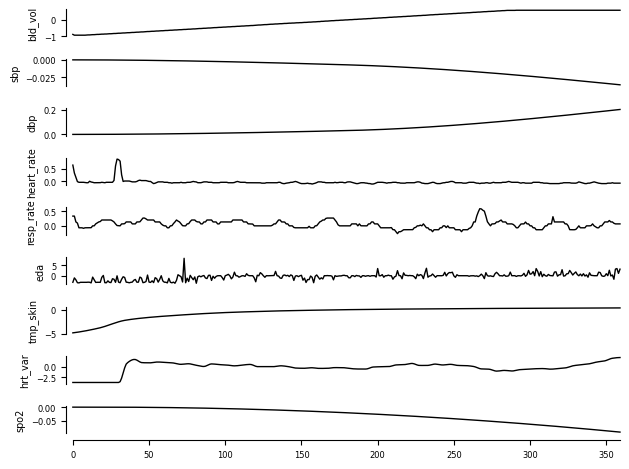

In [6]:
import matplotlib.pyplot as plt
data = patient_372
tp.plot_timeseries(dataframe_372, save_name='out/372_data.pdf', label_fontsize=7); plt.show()

#### Effect Estimation?

In [7]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp1

from tigramite.models import LinearMediation, Prediction

# true_parents = toys._get_true_parent_neighbor_dict(links_coeffs)
true_parents = {0: [(0, -1)],
             1: [(2, -1), (1, -1)],
             2: [(2, -1), (1, 0), (0, -4), (5,-6)],
             3: [(7, -8)],
             4: [(4,-1), (5, -15), (8,-9)],
             5: [(5, -1),(4,0)],
             6: [(0,0), (4, -1)],
             7: [],
             8: []
               }
true_parents_1 = {0: [(0, -1)],
             1: [(2, -1), (1, -1)],
             2: [(2, -1), (1, 0), (0, 0), (5,-6)],
             3: [(7, -8)],
             4: [(4,-1), (8,-14)],
             5: [(5, -1),(6,-1)],
             6: [(5,0), (4, 0)],
             7: [(3,0)],
             8: [(1,-1)]
               }


dataframe = pp.DataFrame(patient_497.values, var_names = var_names)
med = LinearMediation(dataframe=dataframe)
med.fit_model(all_parents=true_parents_1 , tau_max=30)

In [8]:
# print ("Link coefficient (5, -6) --> 2: ", med.get_coeff(i=5, tau=-6, j=2))
print(med.get_ce(i=0, tau=-5, j=2), 
      med.get_ce(i=0, tau=0, j=6), 
      med.get_ce(i=5, tau=-6, j=2),
      med.get_ce(i=4, tau=-7, j=2),
      med.get_ce(i=8, tau=-18, j=2)
     )
[med.get_ce(i=8, tau=-k, j=2) for k in range(30)]

0.15797581702312183 0.0 -0.004912368664415144 0.0001292889655638717 0.0


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0753120348466608e-19,
 8.667287739319046e-06,
 1.9895023703283143e-05,
 3.141903024247632e-05,
 4.243971603858433e-05,
 5.2711888814156115e-05,
 6.219676015738494e-05,
 7.092923025966181e-05,
 7.896757700959465e-05,
 8.637465815867879e-05]

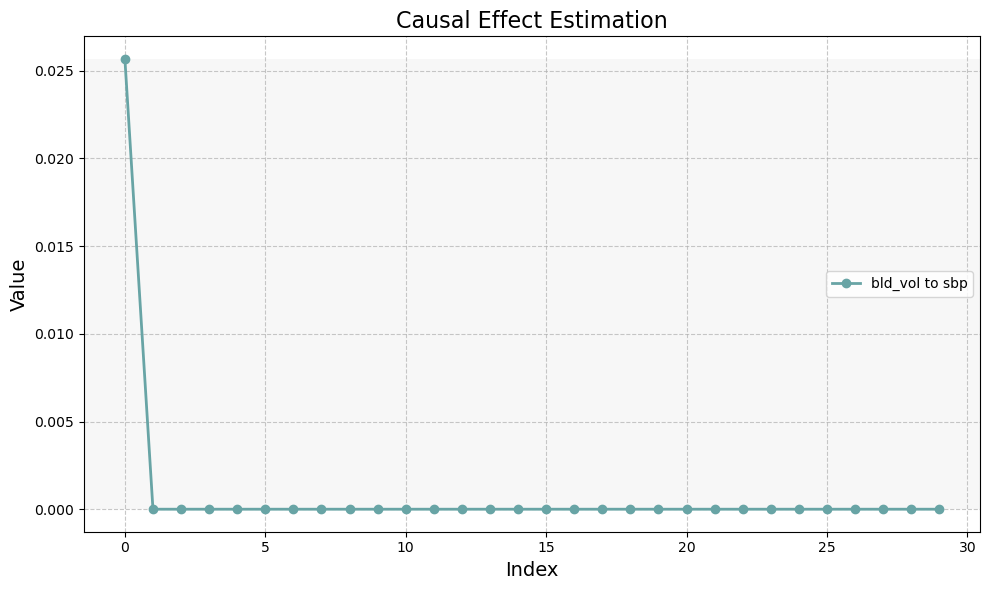

In [10]:
# val_matrix = med.get_val_matrix(symmetrize=True)
# print(val_matrix)
# med.get_ce(i=0, tau=-i, j=1)
import matplotlib.pyplot as plt

# Your lists of numeric values
values_list1 = [med.get_coeff(i=0, tau=-k, j=1) for k in range(30)]
values_list2 = [med.get_coeff(i=0, tau=-k, j=2) for k in range(30)]
# values_list3 = [med.get_coeff(i=5, tau=-i, j=1) for i in range(30)]
# Add more lists as needed

# Custom color map
colors = ['#D9DAD9', '#68A4A5', '#4C8055']

# Create a plot with the provided color map
plt.figure(figsize=(10, 6))

# Plot the first list of values
# plt.plot(values_list1, marker='o', color=colors[0], label='bld_vol to dbp', linewidth=2, markersize=6)
# Plot the first list of values
plt.plot(values_list2, marker='o', color=colors[1], label='bld_vol to sbp', linewidth=2, markersize=6)
# Plot the second list of values
# plt.plot(values_list2, marker='o', color=colors[2], label='eda to dbp', linewidth=2, markersize=6)


# Add more plots for additional lists of values

# Add labels and title
plt.xlabel('Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Causal Effect Estimation', fontsize=16)

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add a background color
plt.axhspan(0, max(max(values_list1), max(values_list2)), facecolor=colors[0], alpha=0.2)

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


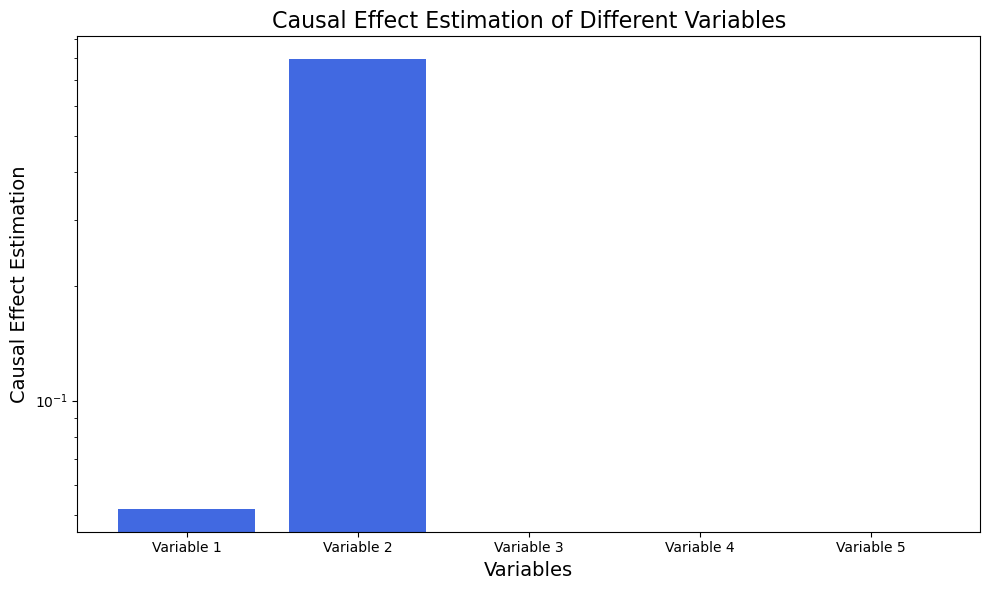

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Your list of numeric values
values = [0.0516836024048887, 0.7970622142935108, -0.004886685687863732, -0.0003058146196045024, -5.692602729680933e-06]

# Corresponding labels for the variables
variables = ['Variable 1', 'Variable 2', 'Variable 3', 'Variable 4', 'Variable 5']

# Create a plot
plt.figure(figsize=(10, 6))

# Create a bar plot with a logarithmic y-axis
plt.bar(variables, values, color='royalblue')

# Set y-axis to logarithmic scale
plt.yscale('log')

# Add labels and title
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Causal Effect Estimation', fontsize=14)
plt.title('Causal Effect Estimation of Different Variables', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()
